## MTH 9879 Market Microstructure Models, Spring 2019

<p>

### Lecture 11: Latency and order routing

<p>
Jim Gatheral   
Department of Mathematics   
  
  
<h3><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2016/04/MFE-Logo.jpg" align = "center" width=500></h3>


$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\cA}{\mathcal{A} }
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\cL}{\mathcal{L} }
\newcommand{\cG}{\mathcal{G} }
\newcommand{\Xv}{X^{(v)}}
\newcommand{\s}{\mathcal{S} }
\newcommand{\cE}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\ee}[1]{{\mathbb{E}\left[{#1}\right]}}
\newcommand{\eef}[1]{{\mathbb{E}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\eefm}[2]{{\mathbb{E}^{#2}\left[\left.{#1}\right|\cF_t\right]}}
\newcommand{\angl}[1]{{\langle{#1}\rangle}}
$$

## Outline of Lecture 11

-   A stylized model of latency cost due to Moallemi and Sağlam
-   A realistic study of latency cost due to Stoikov and Waeber
    - Backtesting using Level-1 data
-   Smart order routing algorithms
    -   Almgren and Harts
    -   Laruelle, Lehalle, and Pagès
    -   Kearns et al.
-   Optimal limit/market order placement (Cont and Kukanov)

### Overview of execution algorithm design

Typically, an execution algorithm has three layers:

-   The macrotrader

    -   This highest level layer decides how to slice the order: when
        the algorithm should trade, in what size and for roughly how
        long.

-   The microtrader

    -   Given a slice of the order to trade (a child order), this level
        decides whether to place market or limit orders and at what
        price level(s).

-   The smart order router

    -   Given a limit or market order, which venue should this order be
        sent to?

In this lecture, we are concerned with the lowest level of the
algorithm: Where to send orders and the effect of latency.

### Latency

We can identify a number of reasons why low latency should be important
to traders:

-   The greater the latency, the more stale information is.
   -   What use is an old order book signal?

-   In a market with price and time priority, being ahead in the limit
    order queue gives a greater chance of execution.

-   The ability to cancel orders ahead of others can be very valuable.

Relative latency rather than absolute latency is what really counts.



### Moallemi and Sağlam

-   The idea of the Moallemi-Sağlam (MS) model is to compare the
    expected profits on a limit order strategy with and without latency.

-   They end up with a simple formula that estimates the cost of latency
    $CL$ as a fraction of the cost of immediacy $\delta$ (basically the
    bid-ask spread) as follows:
    
    $$CL \approx \frac{\sigma \sqrt{\Delta t}}{\delta}\,\sqrt{\log{\frac{\delta^2}{2\,\pi\,\sigma^2\,\Delta t}}}$$
    

-   We see that the formula depends only on the ratio

    $$\frac{\sigma \sqrt{\Delta t}}{\delta},$$
    
    the characteristic
    fraction of the spread that the stock price can move between the
    time the order is sent and the time the order is
    received by the exchange.

### Comparative statics

The cost of latency $CL$:

-   Increases as latency ($\Delta t$) increases.

-   Increases as volatility ($\sigma$) increases.

-   Decreases as the bid-offer spread ($\delta$) increases.

For a small-tick stock, it is found empirically that

$$\delta \approx 2\,\sigma \sqrt{\tau}$$

where $\tau$ is the
characteristic time between trades. 

Then, if
$\epsilon:=\Delta t/(4\,\tau)$, we have, as $\epsilon \to 0$,

$$CL \approx \sqrt{\epsilon\,\log{\frac{1}{2\,\pi\,\epsilon}}}$$


-   Thus, the more active the stock, the more important it is to have
    low latency.

### The MS trading strategy

In the MS model

-   The objective is to sell one share of stock.

-   The bid price evolves as arithmetic Brownian motion (ABM), $S_t = S_0 + 
\sigma W_t$.

-   Impatient traders arrive at the rate $\mu$. These traders execute at
    the bid price plus $\delta$.

-   If the limit order is not filled by time $T$, a market sell order is
    sent.

- The trader is assumed risk neutral, his goal is to maximize the expected profit of selling one share. Let $P$ denote the transacted price and $L$ the collection of all admissible (continuous) strategies of posting limit orders within the time horizon $[0, T]$. The problem can be recast as the optimization problem

$$
h_0 := \max_{\ell \in L[0, T]} \Eof{P} - S_0.
$$



### Limit order execution in the MS model
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/MoallemiFigure1.png" align = "center" width=1000></h2>

### Optimal strategy without latency

-   When there is no latency, the optimal strategy $\ell^*_t$ is to peg a limit
    order at the bid price $S_t$ plus $\delta$, i.e., $\ell^*_t = S_t + \delta$.

    -   Orders are continuously canceled and replaced.
    
- The optimal value is given by 

$$
h_0 = \delta \left( 1 - e^{-\mu T} \right).
$$

### The optimal strategy with no latency
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/MoallemiFigure2.png" align = "center" width=1000></h2>
When there is no latency, the expected cost saving relative to a market
order is given by 

$$h_0=\left(1-e^{-\mu\,T}\right)\,\delta.$$

### Introducing latency

-   The interval $[0,T]$ is split into $n$ subintervals of length $\Delta t=T/n$.
    -   $\Delta t$ is the system latency.

-   The trader sets the price $\ell_i$ of the limit order at time
    $t_i=i\,\Delta t$.

-   This order does not reach the market until time
    $t_{i+1}=t_i+\Delta t$. It is active from time $t_{i+1}$ to time
    $t_{i+2}$.



### Scenarios

Between time $t_i$ when the limit price $\ell_i$ is set and time
$t_{i+1}$ when the limit order with this price reaches the market, three
scenarios can unfold:

1.  $\cA_1$: An impatient buyer can arrive with probability $\mu\,\Delta t$. The
    limit order $\ell_{i-1}$ in force at that time will be executed if
    $\ell_{i-1} \leq S_i+\delta$. The one share is sold and there is no
    more trading.

2.  $\cA_2$: If $S_{i+1} \geq \ell_i$, the limit order will be marketable when it
    reaches the market and will be filled. Again, the one share is sold
    and there is no more trading.

3.  $\cA_3$: Otherwise, the limit order at $\ell_i$ stays in the book for the
    next period $[t_{i+1},t_{i+2})$. The process continues.



### The optimization problem

The trader is again assumed to be risk-neutral. He seeks to solve the
optimization problem

$$h_0(\Delta t)=\max_{\{\ell_0,...,\ell_{n-1}\}}\,\mathbb{E} [P]-S_0$$

where $P$ is the sale price of the stock.

This problem may be solved exactly using dynamic programming with the
boundary condition that if there is only one period left, the
continuation value is zero because at that point, a market order must be
submitted.



### Intuition behind the solution

-   Consider the situation at time $t=0$ when the bid price is $S_0$.

-   If there were no latency, the optimal strategy would be to peg our
    sell order to the offer at $S_0+\delta$; if an impatient buyer
    arrives, our probability of selling to him is one.

-   If there is latency, this strategy is no longer optimal because the
    probability of a fill after time $\Delta t$ is only $1/2$.

-   By lowering the limit price a little however, we can significantly
    increase the probability of trading with an impatient buyer thus
    potentially significantly increasing our potential cost saving
    relative to a market order.



### The effect of latency on the optimal choice of limit price
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/MoallemiFigure4.png" align = "center" width=1000></h2>


### The probability of a fill

-   If the limit price $\ell_0=S_0+\delta$, the probability of execution
    (conditional on the arrival of an impatient trader) is
    
    $$
    \beas
    \Pr(\ell_0 \leq S_1+\delta)
    &=&\Pr(S_0+\delta \leq S_0+\sigma\,\sqrt{\Delta t} \,Z +\delta)\\
    &=&\Pr(Z\geq 0)\\&=&\frac{1}{2}
    \eeas
    $$
    
    where $Z\sim N(0,1)$.

-   If the limit price $\ell_0=S_0+\delta-C\,\sigma\,\sqrt{\Delta t}$,
    the probability of execution (conditional on the arrival of an
    impatient trader) is

$$
\beas
    \Pr(\ell_0 \leq S_1+\delta)&=&\Pr(S_0+\delta - C\,\sigma\,\sqrt{\Delta t} \leq S_0+\sigma\,\Delta t \,Z +\delta)\\
    &=&\Pr(Z\geq -C)>\frac{1}{2}
    \eeas
    $$

### Value function and dynamic programming

Define the value function $J_{t_i}$ at time $t_i$ as 

$$
J_{t_i}(S_{t_i}, \ell_{i-1}) := \max_{\ell_i, \cdots, \ell_{n-1}} \Eof{P|S_{t_i}, \cE_{t_i}, \ell_{i-1}} - S_{t_i}
$$

where $\cE_{t_i}$ denotes the event that the trader's limit order hasn't been executed till time $t_i$.

$J$ satisfies the Bellman equation 

$$
J_{t_i}(S_{t_i}, \ell_{i-1}) = \max_{\ell_i} \Eof{\left. \1_{\cA_1} (\ell_{i-1} - S_{t_i}) + \1_{\cA_2} (S_{t_{i+1}} - S_{t_i}) + \1_{\cA_3} J_{t_{i+1}}(S_{t_{i+1}}, \ell_i) \right|S_{t_i}, \cE_{t_i}, \ell_{i-1}},
$$

where recall that $\cA_1$ denotes the event that the limit order at price $\ell_{i-1}$ is lifted by an impatient buyer at time $t_i$, $\cA_2$ the event that the limit order is lifted by the market bid, and $\cA_3$ the event that the limit order remains unfulfilled till $t_{i+1}$. 

The terminal condition for value function is $J_{t_n}(S_{t_n}, \ell_{n-1}) = 0$. In principle, one can solve the Bellman equation for the value function $J$ and the optimal strategy $\ell^*$ by backward induction. 

### Heuristic solution for small $\Delta t$

-   We can get very close to the optimal solution by greedily maximizing
    the probability of interacting with an impatient buyer at each step.

-   With $\ell_0=S_0+u$, The optimal value $u^*$ of $u$ is then given by

    \begin{eqnarray*}
    u^*= \arg\max_u \mathbb{E} \left[(S_0+u-S_1)\,\mathbb{1} _{\mathcal{E} }\right]\end{eqnarray*}

    where $\mathcal{E} $ is the event that
    $S_1 \leq \ell_0=S_0+u\leq S_1+\delta$.

    -   If $S_1 > S_0+u$, the limit order becomes marketable at time
        $t_1$ and is executed at the bid.

    -   If $S_0+u > S_1+\delta$, the limit order cannot be filled by an
        impatient buyer.

#### Note
This is equivalent to maximize the conditional expected profit of selling one limit order at time $t_1$, conditioned on the arrival of an impatient buy order at $t_1$.  


### Formulation of solution

By assumption $S_1-S_0 = \sigma\,\sqrt{\Delta t}\,z$ with
$z \sim N(0,1)$. Let

$$x=\frac{u}{\sigma\,\sqrt{\Delta t}};\quad \Delta = \frac{\delta}{\sigma\,\sqrt{\Delta t}}.$$

Then

$$\mathbb{E} \left[(S_0+u-S_1)\,\mathbb{1} _{\mathcal{E} }\right]=\sigma\,\sqrt{\Delta t}\,\int_{x-\Delta}^x \,(x - z) N'(z)\,dz.$$

Define the dimensionless ratio $\theta^* = u^*/\delta$. Then

$$\theta^* =  \arg\max_x \frac{1}{\Delta}\,\int_{x-\Delta}^x \,(x - z) N'(z)\,dz.$$


-   Note that $\theta^*$ depends only on $\Delta$ which in turn depends
    only on latency expressed in the natural timescale
    $(\delta/\sigma)^2$.

### Code to compute $\theta^\star(\Delta)$

In [2]:
h <- function(x, del){
    dnorm(x) - dnorm(x - del) + x*(pnorm(x) - pnorm(x - del))
}

theta.raw <- function(del){
    hh <- function(x){-h(x, del)}
    res <- optimize(hh, interval=c(0, del))
    res$minimum/del
}

theta <- function(del){sapply(del, theta.raw)}

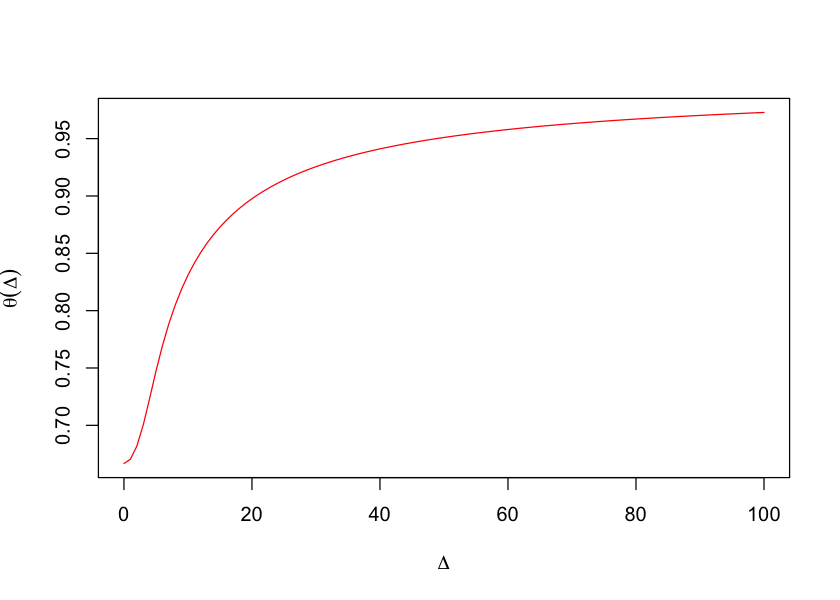

In [3]:
library(repr)
options(repr.plot.height=5)

curve(theta(x),from=0.01,to=100,col="red",ylab=expression(theta(Delta)),xlab=expression(Delta))

Figure 1: Graph of optimal limit order level $\theta^*(\Delta)$ vs
$\Delta = \delta/{\sigma\,\sqrt{\Delta t}}$

### Cost of latency

The proportion of profitability lost due to latency is given by $
CL := 1-\theta^*(\Delta) 
$. We can redo the plot in terms of latency $\tau$ in normalized units
(which is just $1/\Delta^2$).

In [4]:
del <- seq(1, 100, .1)

x <- 1/del^2
y <- 1 - theta(del)

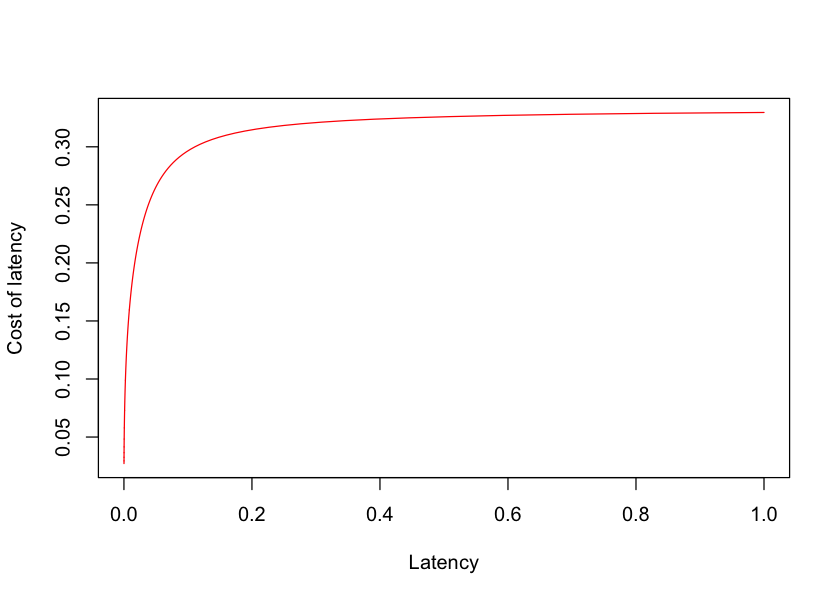

In [5]:
plot(x,y,type="l",col="red",ylab="Cost of latency",xlab="Latency")

Figure 2: Cost of latency vs normalized latency $\tau$

### Solution

Define

$$
\begin{eqnarray*}
f(x) &=& \int_{x-\Delta}^x \,(x - z) N'(z)\,dz\\ &=& x\,\left[N(x)-N(x-\Delta)\right] + N'(x)-N'(x-\Delta).\end{eqnarray*}
$$

The maximum is found when $f'(x)=0$.

$$
\begin{eqnarray*}
f'(x) &=&N(x)-N(x-\Delta) \\&&+x\,\left[N'(x)-N'(x-\Delta)\right] + N''(x)-N''(x-\Delta)\\
&=&N(x)-N(x-\Delta) +x\,\left[N'(x)-N'(x-\Delta)\right]\\&&-x\, N'(x)+(x-\Delta)\,N'(x-\Delta)\\
&=&N(x)-N(x-\Delta) -\Delta\,N'(x-\Delta).\end{eqnarray*}
$$

Formally
$$\theta^* =  \left\{x :  N(x)-N(x-\Delta) -\Delta\,N'(x-\Delta)=0  \right\}.$$

We are interested in the limit $\Delta \to \infty$.  Define 
$y=\Delta-x $. Then

$$f'(x) \sim 1- N(-y)- \Delta\,N'(-y) = 0.$$

For this
equation to have a solution, we must have

$$\Delta\,N'(-y) \sim \Delta\,e^{-y^2/2} \sim 1$$

from
which it follows that $y \sim \sqrt{\log \Delta}$.

Then
$N(-y) \to 0$ as $\Delta \to \infty$
and

$$\Delta\,N'(-y)=\Delta \,\frac{e^{-y^2/2}}{\sqrt{2\,\pi}} \approx 1$$

which has the solution

$$y \approx \sqrt{2\,\log \frac{\Delta}{\sqrt{2\,\pi}}}= \sqrt{\log \frac{\Delta^2}{{2\,\pi}}}.$$

Define the normalized latency
$\tau =\sigma^2\, \Delta t/ \delta^2 = 1/\Delta^2$. By definition of the
cost of latency,

$$CL = \frac{y}{\Delta} \approx \sqrt{ \tau}\, \sqrt{-\log 2\,\pi\,\tau}= \sqrt{-\tau\,\log 2\,\pi\,\tau}$$

which coincides with the result of [Moallemi and Sağlam]<sup id="cite_ref-Moallemi" class="reference"><a href="#cite_note-Moallemi"><span>[</span>6<span>]</span></a></sup>.

### Approximation quality

In [9]:
latencyCostApprox <- function(tau){sqrt(-tau*log(2*pi*tau))}

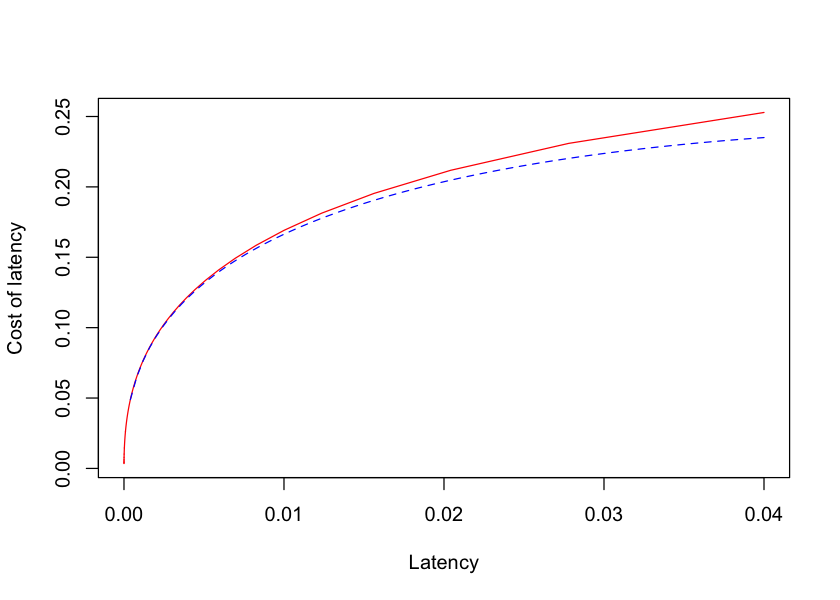

In [10]:
del <- 5:1000
tau <- 1/del^2; lc <- 1-theta(del)
plot(tau,lc,type="l",col="red",ylab="Cost of latency",xlab="Latency")
curve(latencyCostApprox(x),from=0,to=0.04,col="blue",lty=2,add=T)

### Code to compute approximation given latency, spread and volatility

In [12]:
tau <- function(latency.ms, spread, price, vol){ # latency in milliseconds
    latency.annualized <- latency.ms/1e3/60/60/24/252
    vol^2*latency.annualized*price^2/spread^2
}

The following code fragment takes latency in milliseconds and other stock statistics to estimate latency cost.

In [13]:
tau.norm <- tau(latency.ms=200, spread=0.15, price=943, vol=.1544)

latencyCostApprox(tau.norm)

[1] 0.1587467

### Numerical estimates of cost of latency
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/04/LatencyCost.png" align = "center" width=1000></h2>

### Stoikov and Waeber

- In a more recent paper, [Stoikov and Waeber]<sup id="cite_ref-StoikovWaeber" class="reference"><a href="#cite_note-StoikovWaeber"><span>[</span>7<span>]</span></a></sup> explore a similar idea but in a much more realistic setting.


- It is widely known that the order book (or imbalance) signal 
$$
I_t = \frac{B_t}{B_t+A_t}
$$
is a good predictor of future price movement over the short term (see Lecture 1). 

    - In particular, market participants tend to send market orders only when $I_t$ is close to $0$ or $1$.


- The question is to what extent latency reduces the value of this signal.


- In passing, Stoikov and Waeber show how to backtest an algorithm using only Level-1 data.

###  Order imbalance just before a trade

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/05/StoikovWaeberFig1.png" align = "center" width=800></h2>

### Model setup

- The current bid price $P_t$ and order imbalance $I_t$ are jointly Markov.  Price increments are independent of the current price.


- Given our system latency $L$, our objective is to compute a stopping time $\tau$ that maximizes our expected sale price for one share in the interval $(t,T]$ conditional on the current order imbalance $I_t$.  That is
$$
\sup_{t \leq \tau \leq T-L} \ee{ \left. P_{\tau+L} - P_t \right| I_t}
$$

- Define the payoff at the latest possible time $t = T-L$:
$$
g^L(x) = \ee{ \left. P_{T} - P_{T-L} \right| I_{T-L}=x} = \ee{ \left. P_L - P_0 \right| I_0=x}
$$
by the Markov property.

    - The function $g^L$ thus quantifies the loss of benefit of the signal $I_t$ as a function of latency $L$.
    
    
- The following figure shows that empirically (on data from the 5-year Treasury market in July 2010), as expected, $g^L$ grows dramatically with $L$.

###  The effect of latency as a function of $I_t$

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/05/StoikovWaeberFig2.png" align = "center" width=800></h2>

### Solution of the optimization problem

- To solve the problem, prices $P_t$ are assumed to be on a tick grid and imbalances $I_t$ are quantized (by computing quantiles) so that $I_t \in \{1,...,M\}$ for some $M$.


- The value function for this discretized problem
$$
V^L(0,i) = \sup_{0 \leq \tau \leq T-L} \ee{ \left. P_{\tau+L} - P_0 \right| I_0=i}.
$$
is found by solving the Bellman equation
$$
V^L(n,i) = \max \left\{G^L(i),\ee{ \left. V^L(n+1,I_{n+1}) \right| I_n=i}\right\}
$$
where 
$$
G^L(i) = \ee{ \left. P_L - P_0 \right| I_0=i}
$$ 
is the quantized immediate payoff function.

- To compute the conditional expectation, we need the transition probabilities.  These can be estimated empirically.


- Just as in the case of optimal exercise of American options, there are trade and no-trade regions.
    
    - Don't trade if $G^L(i) \leq V^L(i) $.
    
    - Trade if $G^L(i)= V^L(i) $.

### Backtesting the algorithm

Stoikov and Waeber address market impact and latency of real orders as follows.

- The backtest uses market orders only.
- The imbalance-based algorithm IMB is compared with TWAP (both of which presumably create similar market impact).
- $T=1$ minute; both IMB and TWAP are required to liquidate one share per minute.
- An order submitted at time $\tau$ is executed at the best price available at time $\tau+L$.


### Backtesting results

<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/05/StoikovWaeberTable1.png" align = "center" width=1000></h2>

- We see that as expected, the value of incorporating the imbalance signal declines as latency increases.

### Order routing

-   There are currently approximately 13 lit venues and over 40 dark
    venues in the US.

    -   On the one hand, it would be prohibitively complicated and
        expensive to route to all of them.

    -   On the other hand, by not routing to a particular venue, the
        trader misses out on potential liquidity, and all things being
        equal, will incur greater market impact.


-   Most traders have to use a smart order routing (SOR) algorithm provided by a dealer.



### Turnover by lit venue (from Fidessa)
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2018/04/LitVenueTurnover.png" align = "center" width=1000></h2>

### List of dark pools (from Wikipedia)

<span>**Independent dark pools**</span>

- Chi-X Global

-   Instinet

-   Liquidnet

-   NYFIX Millennium

-   Posit/MatchNow from Investment Technology Group (ITG)

-   State Street's BlockCross

-   RiverCross Securities

-   SmartPool

-   TORA Crosspoint

-   ETF One

- Codestreet Dealer Pool for Corporate Bonds


<span>**Broker-dealer-owned dark pools**</span>
- JPMorgan Chase Bank - JPMX

-   Barclays Capital - LX Liquidity Cross

-   BNP Paribas - BNP Paribas Internal eXchange (BIX)

-   BNY ConvergEx Group (an affiliate of Bank of New York Mellon)

-   Cantor Fitzgerald - Aqua Securities

-   Citi - Citi Match, Citi Cross

-   Credit Agricole Cheuvreux - BLINK

-   Credit Suisse - CrossFinder

- Deutsche Bank Global Markets - DBA (Europe), SuperX ATS (U.S.)

-   Fidelity Capital Markets

-   GETCO - GETMatched

-   Goldman Sachs SIGMA X

-   Knight Capital Group - Knight Link, Knight Match

-   Deutsche Bank Global Markets - DBA (Europe), SuperX ATS (U.S.)

-   Merrill Lynch - Instinct-X

-   Morgan Stanley - MSPOOL

-   Nomura - Nomura NX

-   UBS Investment Bank - UBS ATS, UBS MTF, UBS PIN

-   Sociéte Générale - ALPHA Y

-   Daiwa - DRECT

### List of dark pools (from Wikipedia)

You can see the whole list here:

https://en.wikipedia.org/wiki/Dark_liquidity



### Smart order routing (SOR)

-   The goal of an SOR algorithm is to buy (or sell) as many shares as
    possible in the shortest time by optimally allocating orders across
    both lit and dark venues.

    -   In the case of lit venues, there are hidden orders so there is
        typically more liquidity available than is displayed.

        -   Where to route an order involves not just visible liquidity
            but also expected costs of execution.

    -   In dark venues, by definition, all liquidity is hidden.

-   We will describe

    -   A heuristic algorithm due to Almgren and Harts

    -   An algorithm due to Charles-Albert Lehalle and his collaborators

    -   An algorithm based on machine learning techniques due to Michael
        Kearns and his collaborators.

### The Almgren and Harts (AH) algorithm

-   The idea of this algorithm is that the more hidden quantity is
    detected in a given venue, the more hidden quantity there is likely
    to be.

    -   Recall that this is a characteristic of distributions with
        fatter tails than exponential.

    -   Also, we believe in power-law distribution of quantity in which
        case this assumption would definitely be justified.

-   For simplicity, let’s focus on the sale of stock.

-   If hidden quantity $w$ is detected (by selling more than the visible
    quantity) on a particular venue, the current estimate of hidden
    liquidity is increased by $w$.

-   If no hidden quantity is detected on a venue, the existing
    estimate is decremented by a factor $\rho$.

### Conditional distribution of quantity: Exponential case

Suppose that the distribution of order sizes $Q$ is exponential so that

$$\Pr(Q>n)= \frac{1}{\lambda}\,e^{-\lambda\,n}$$

Assuming the
conditional probability that hidden quantity is greater than $n$ given
that $n$ slices have already been observed is given by

\begin{eqnarray*}
\Pr(Q\geq (n+1)|Q\ge n)=\frac{\Pr(Q\geq (n+1))}{\Pr(Q\ge n)}=e^{-\lambda}\end{eqnarray*}

If the distribution of $Q$ is exponential, the conditional probability
of more quantity is independent of the quantity already observed.



### Conditional distribution of quantity: Power-law case

Suppose that the distribution of order sizes $Q$ is power-law so that

$$\Pr(Q>n)= \frac{C}{n^\alpha}$$

Assuming the conditional probability
that hidden quantity is greater than $n$ given that $n$ slices have
already been observed is given by

\begin{eqnarray*}
\Pr(Q\geq (n+1)|Q\ge n)&=&\frac{\Pr(Q\geq (n+1))}{\Pr(Q\ge n)}\\
&=&\left(\frac{n}{n+1}\right)^\alpha\\
&\to& 1 \text{ as } n \to \infty\end{eqnarray*}

If the distribution of $Q$ is power-law, the conditional probability of
more quantity tends to $1$ as the quantity observed increases.



### The AH algorithm

Our goal is to execute a sell order as quickly as possible by optimally
allocating quantity to all $N$ venues. To avoid eating into the book, we
send IOC (“immediate or cancel”) orders only. We will simplify the
Almgren-Harts algorithm by assuming no liquidity above the displayed
best bid.

-   We allocate quantity quasi-greedily sequentially to the venue with
    the highest estimated quantity, visible and hidden.

-   If we see a fill of size $n_{j}$ when the displayed quantity is
    $q_{j}$ on the $j$th venue, the pre-existing liquidity estimate
    $R_j$ is decayed by a factor $\rho$ and incremented by the detected
    hidden liquidity: 
    
    $$R_j \mapsto \rho\,R_j+(n_j-q_j)^+$$


-   Repeat until our quantity is exhausted and the order is completed.

### A stochastic Lagrangian algorithm

[Laruelle, Lehalle and Pagès]<sup id="cite_ref-LLP" class="reference"><a href="#cite_note-LLP"><span>[</span>4<span>]</span></a></sup> propose the following way of looking at optimal allocation to dark
pools.

-   Let be $V$ be the total volume to be executed

-   For the $i$th dark pool, $\rho_i$ is the relative cost saving, $D_i$
    is the quantity available, and $r_i$ is the proportion of the order
    sent there.

-   Then the cost of a buy order is given by

    $$\mathcal{C} =S\,\left\{V-\sum_{i=1}^N\,\rho_i\,\min(r_i\,V,D_i)\right\}$$
    
    where the $\rho_i \in (0,1)$.

-   The optimization problem is then

    $$\max_{r_i} \left\{\sum_{i=1}^N\,\rho_i\,\mathbb{E} \left[\min(r_i\,V,D_i)\right]: \sum_{i=1}^N r_i=1, r_i \geq 0\; \forall i \right\}.$$

### The mean execution function

Given a dark pool $i$, define its <span>*mean execution function*</span>

$$\varphi_i(r) := \rho_i \,\mathbb{E} \left[\min(r\,V, D_i)\right].$$

Then
$\varphi_i$ is finite, nonzero, and concave in $r$. Also

$$\varphi_i'(r)=\rho\,\mathbb{E} \left[{\mathbb 1}_{\{r\,V < D_i\}}\,V\right].$$

The
optimization problem becomes

$$\max_{r_i} \left\{\sum_{i=1}^N\,\varphi_i(r_i): \sum_{i=1}^N r_i=1\right\}$$



### Solution

Introducing a Lagrange multiplier $\lambda$, this problem is equivalent
to

$$\max_{r_i} \left\{\sum_{i=1}^N\,\varphi_i(r_i)-\lambda\,\left(\sum_{i=1}^N r_i-1\right)\right\}.$$

At the optimal point $r_i^\star$, we must have

$$\varphi_i'(r_i^\star) - \lambda = 0 \quad \forall i \quad \Longrightarrow \quad \varphi_i'(r_i^\star)=\frac 1 N \sum_{i=1}^N\,\varphi_i'(r_i^\star)=:\bar \varphi'.$$



### The stochastic Lagrangian algorithm

This leads naturally to the suggested algorithm

<p>

<font color="red">
Stochastic Lagrangian (SL) algorithm 

<p>

$$\Delta r^{n+1}_i=r^{n+1}_i-r^n_i=\gamma_n\,\left\{\varphi_i'(r_i^n)-\bar \varphi'_n\right\}$$

</font>


-   More quantity is sent to dark pools with higher liquidity $D_i$, as
    observed in the history of executions.

-   More quantity is sent to the dark pools offering lower-cost
    execution (<span>*i.e.*</span> greater $\rho_i$).

-   With various technical assumptions, [Laruelle, Lehalle and Pagès]<sup id="cite_ref-LLP" class="reference"><a href="#cite_note-LLP"><span>[</span>4<span>]</span></a></sup> prove the convergence of
    this algorithm.



### Estimation of the $\rho_i$

-   How would one go about estimating the cost saving (if any)
    associated with execution in a dark pool (or in a lit venue)?


-   The total cost comprises commissions, fees and rebates and most
    importantly, adverse selection.

    -   Commissions, fees and rebates vary widely between exchanges.

    -   Adverse selection can be proxied by measuring the realized
        spread: Where is the mid-price (for example) one minute after an
        execution?



### Discussion of [Laruelle, Lehalle and Pagès]<sup id="cite_ref-LLP" class="reference"><a href="#cite_note-LLP"><span>[</span>4<span>]</span></a></sup>

-   The fact that the algorithms of [Laruelle, Lehalle and Pagès]<sup id="cite_ref-LLP" class="reference"><a href="#cite_note-LLP"><span>[</span>4<span>]</span></a></sup> explicitly take into account
    the perceived relative advantages of executions in the various
    venues is a major strength of their algorithms.


-   However, they make no assumption on the distribution of quantity in
    the dark pool – we know empirically that this is fat-tailed.

    -   If you submit $r_i\,V$ and your order is filled in its entirety,
        there is very likely to be more quantity available.



### The Kearns et al. (GKNW) algorithm

-   The idea behind the GNKW algorithm is not dissimilar to the ideas
    behind the previous algorithms although, as written, it is applied
    only to dark pools.


-   In the <span>*allocation*</span> phase, orders are allocated
    greedily to the venue with the greatest estimated liquidity.

    -   The greedy algorithm is explained in detail in the GKNW paper
        and is proved to be optimal in some precise sense.

-   In the <span>*re-estimation*</span> phase, the estimated tail
    quantities of the order-size distributions are updated 
    according to a specified rule.


-   Allocation and re-estimation are performed in a continuous loop.

### The greedy allocation algorithm

-   Let $P_j(q)$ be the probability of there being $q$ shares at the
    $j$th venue. Define 
    
    $$T_j(q)=\sum_{n\geq q} P_j(n)$$
    
    to be the
    $j$th tail probability. The empirical estimate of $T_j$ is denoted
    by $\hat T_j$.

-   If $\bf v$ is the allocation vector of the total quantity $V$ to the
    various venues, allocate as follows:

    -   Set ${\bf v}={\bf 0}$;

    -   While $\sum v_i < V$,
        $i = \arg \max_i \hat T_i(v_i+1)$,
        $v_i = v_i +1$;

    -   Return ${\bf v}$.

### The Kaplan-Meier estimator

-   If an order is filled in its entirety, we know only that there was
    at least that much quantity available.

    -   In statistics, this is called a <span>*censored*</span>
        observation.

-   Let $z(s)=\Pr(q=s|q \geq s)$ be the conditional probability that
    there are exactly $s$ orders given that the quantity available is at
    least $s$. Then

    \begin{eqnarray*}
    T_j(q)=\Pr(n \geq q)&=&\prod_{s=0}^{q-1}\frac{\Pr(n \geq (s+1))}{\Pr(n \geq s)}\\
    &=&\prod_{s=0}^{q-1}\Pr(n > s | n \geq s)\\
    &=&\prod_{s=0}^{q-1}(1-z(s))\end{eqnarray*}

### The Kaplan-Meier estimator

The Kaplan-Meier estimator is then

$$\hat T_j(q)=\prod_{s=0}^{q-1}(1-\hat z(s))$$

where

$$\hat z(s)=\frac{D_s}{N_s}$$

is an empirical estimate of the
probability that the available quantity is exactly $s$.

$D_s$ is the number of direct (uncensored) observations and $N_s$ is the
total number of observations (censored and uncensored) that could
potentially have been $s$. (In medicine, $D_s$ typically represents deaths at time $s$ and $N_s$ represents the number of patients still in the study at time $s$).



### Modifying Kaplan-Meier

-   [Kearns et al.]<sup id="cite_ref-Kearns" class="reference"><a href="#cite_note-Kearns"><span>[</span>3<span>]</span></a></sup> derive a cut-off point $c_j$ for each venue such that for
    $s < c_j$, the tail probability estimate $\hat T_j(s)$ is guaranteed
    to be close to the true probability $T_j(s)$.

-   In an <span>*Exploitation Lemma*</span> they show that if the
    allocation to the $j$th venue is less than $c_j$, there is
    sufficient data to estimate the tail probability and the allocation
    is provably optimal.

    -   In this case, the Kaplan-Meier estimate is used as $\hat T_j(s)$
        in the allocation algorithm, without modification.

-   If $s > c_j$, the tail probability is optimistically estimated as
    $\hat T_j(s)=\hat T_j(c_j)$.

    -   By making this “optimistic” modification to the K-M estimate,
        the authors ensure that no venue remains unexplored simply
        because the algorithm has only a few observations of small
        quantity from that venue.

### The main result
<p>

#### <font color="red"> Theorem
For any $\epsilon > 0$ and $\delta >0$, with probability $1-\delta$,
after running for a time polynomial in $N$, $V$, $1/\epsilon$ and
$\log 1/\delta$, the algorithm makes an $\epsilon$-optimal allocation on
each subsequent time step with probability at least $1-\epsilon$.
</font>

-   Recall that $N$ is the number of venues and $V$ is the total
    quantity to be traded.



### Parametric quantity distributions

-   In practice, the Kaplan-Meier estimate of tail probability does very
    well in-sample but not surprisingly not very well out-of-sample due
    to serious over-fitting.


-   By splitting a large sample of dark-pool trades into a training set
    and a test set, [Kearns et al.]<sup id="cite_ref-Kearns" class="reference"><a href="#cite_note-Kearns"><span>[</span>3<span>]</span></a></sup> were able to show that the parametric form
    ZB+power-law works best.

    -   That is, one estimates the probability of zero quantity
        separately (most of the time there is zero quantity), and fits a
        power-law of the form $1/s^\beta$ to the rest of the data.

    -   $\beta$ is found to lie mostly between $0.25$ and $1.3$. Compare
        with our previous stylized fact that quantity is distributed
        according to a 3/2 law.



### A simulation study

-   As is usual with these problems, an algorithm can only be tested by
    experiment or simulation.

    -   The data comes from particular choices of algorithm and we can’t
        predict what would have been if the algorithm had chosen to act
        differently.

-   It being impossible to experiment, the authors chose simulation.

-   Four algorithms are compared:

    -   Ideal allocation from knowing the true distributions used for
        the simulation.

    -   Equal allocation across venues

    -   The GKNW learning algorithm with ZB+Power Law parameterization

    -   A <span>*bandit*</span> algorithm that begins with equal
        weights. If there is any execution at a particular venue, that
        venues weight is increased by a factor $\alpha=1.05$.

### Simulation results
<h2><img src="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/04/Simulation.png" align = "center" width=700></h2>


### Why do new venues attract any order flow?

-   Once a venue has volume, it’s clear to see that it is optimal to
    route some part of your order flow to that venue.

-   Why does the new venue attract any flow to start with?

-   Part of the answer might lie in the use of algorithms like GNKW.

    -   A machine-learning algorithm will always allocate a minimum
        amount of flow to a given venue; otherwise that venue will
        remain unexplored.



### Cont and Kukanov: optimal limit order placement

-   Assume a buy order

-   Venues $k=1,...,K$ are characterized by

    -   Bid queue lengths $Q_k$

    -   Make rebates $r_k$, take fees $f_k$, half-spread $h = s/2$.

-   Simplify by assuming that any market order is sent to the venue with
    the smallest take fee $f$.

-   Order placement strategy is $X= \left(M,L_1,...,L_K\right)$ where
    the components represent volumes of the single market order and the
    $k$th limit orders respectively.

-   The tradeoff is between cost and execution probability.

    -   On a given exchange, the lower the price of the limit order, the
        lower the probability of execution

    -   On multiple exchanges, the higher the rebate, the longer the
        queue length, the lower the probability of execution.

### Solution for single venue (see Lecture 2)

-   If $\lambda_u$ is in a suitable range,

    $$L^* =F^{-1} \left(\frac{2 h + f + r}{\lambda_u + h + r}\right)-Q , \quad\quad M^* = \tilde X - L^*.$$
    
    where $F(\cdot)$ denotes the distribution of $\xi$ (which is
    increasing in $\xi$).

-   Comparative statics. $L^*$ is:

    -   decreasing in $Q$,

    -   increasing in $h$,

    -   increasing in $f$,

    -   decreasing in $\lambda_u$,

    -   increasing in $r$.

-   As the target size $\tilde X$ increases, $L^*$ is fixed and $M^*$
    increases.

-   $F(\cdot)$ may be estimated in real time using recent outflow data
    (and potentially other signals).

    -   $F(\cdot)$ need not be parametric.

### Solution for multiple venues

-  Let $\mathcal{A} (X^*,\xi)$ denoted executed quantity. When the allocation is optimal,

    \begin{eqnarray*}
    \mathbb{P}\left(\mathcal{A} (X^*,\xi)<\tilde X\right)&=& \frac{h+f+\lambda_o}{\lambda_u+\lambda_o}\\
    \mathbb{P}\left(\left.\mathcal{A} (X^*,\xi)<\tilde X \right| \xi_j > Q_j + L^*_j\right)&=& \frac{\lambda_o-(h+r_j)}{\lambda_u+\lambda_o}\end{eqnarray*}


-   Note that the bigger the rebate $r_j$ on a given exchange, the lower the conditional shortfall probability.
       - This can be used to define $\lambda_u$ and $\lambda_o$ in terms of maximal under-fill probabilities.

-   One interesting insight from the solution is that execution cost is
    lower with multiple venues relative to a single venue if the
    outflows $\xi_k$ are sufficiently uncorrelated.

    -   This amounts to a condition for optimality of order-flow
        fragmentation.

### Summary

-   The cost of latency can be estimated using a simple formula that
    uses only volatility and spread.

    -   The benefit of extra technology investment can be estimated on
        the back of an envelope.
        

- Stoikov and Waeber apply this idea to a realistic strategy based on order imbalance and further show how to backtest their algorithm using only Level-1 data.



-   We presented various smart order routing algorithms, some of
    which are provably optimal in some sense.

    -   A better algorithm would incorporate the best features of the
        best of these algorithms (SL and AH?).

-   [Cont and Kukanov]<sup id="cite_ref-ContKukanov" class="reference"><a href="#cite_note-ContKukanov"><span>[</span>2<span>]</span></a></sup> show how to optimally distribute limit orders and
    market orders between venues based on estimation of execution
    probabilities, rebates and fees.

### A philosophical question

#### <font color="red"> Question
<font color=red> Why should it be so complicated to trade stock? </font>
<p>
<font color="black">
One answer goes something like this:

-   Changes in market structure together with technological innovation
    have massively reduced trading costs.

-   Nevertheless, some market participants achieve significantly lower
    costs.

    -   This requires either substantial investment in technology and
        trading expertise or

    -   careful selection of broker algorithms.



### Potential cost savings from optimal scheduling

With reasonable assumptions, assuming the square-root model, savings
relative to a simple VWAP are roughly of the following order:

-   Around 15% for the Alfonsi-Fruth-Schied bucket-like strategy

-   Around 25% for a suitable bursty strategy (intermittent interval
    VWAPs) with a capped participation rate.



### Potential cost savings from microtrader improvements

-   Were we just to blindly send market orders, we would estimate that
    the cost of each child order would be around a half-spread.

-   Practical experience shows that it is not possible to reduce this
    cost much below one third of a spread.

-   We conclude that we could potentially save up to one sixth of the
    spread.



### Potential cost savings from smart order routing

-   A naïve estimate would be to use the square-root market impact
    formula, changing the denominator $V$ to reflect the potential
    increase in liquidity from routing to extra venues.

    -   If the potential liquidity accessed is doubled, costs should be
        decreased by $1-1/\sqrt{2} \approx 30\%$ according to this
        simple computation!

    -   This could be one explanation for the multiplicity of trading
        venues in the US.

-   We expect actual savings to be much less than this because the
    different venues are all connected and information leaks from one
    venue to the other.

### Final conclusion

-   Recent empirical and theoretical work on market microstructure has
    led to a much improved understanding of how to trade optimally.


-   Potential savings from careful order execution relative to VWAP
    using a simple first-generation algorithm are substantial.

    -   Relative to a naïve strategy, cost savings of $25\%$ for
        reasonably sized orders are not unreasonable.



### References

<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>

  <li id="cite_note-AlmgrenHarts"><span class="mw-cite-backlink"><b><a href="#cite_ref-AlmgrenHarts">^</a></b></span>Robert Almgren and Bill Harts, A dynamic algorithm for smart order
routing, <span>*White paper StreamBase*</span> (2008).
  </li>
  
  <li id="cite_note-ContKukanov"><span class="mw-cite-backlink"><b><a href="#cite_ref-ContKukanov">^</a></b></span>   Rama Cont and Arseniy Kukanov, Optimal order placement in limit order
markets, 
*Quantitative Finance* **17**(1) 21-39 (2017).</li>
  
  <li id="cite_note-Kearns"><span class="mw-cite-backlink"><b><a href="#cite_ref-Kearns">^</a></b></span>Kuzman Ganchev, Michael Kearns, Yuriy Nevmyvaka and Jennifer Wortman
Vaughan, Censored exploration and the dark pool problem,
<span>*Communications of the ACM*</span> <span>**53**</span>(5) (2010).
  </li>
  
  <li id="cite_note-LLP"><span class="mw-cite-backlink"><b><a href="#cite_ref-LLP">^</a></b></span>Sophie Laruelle, Charles-Albert Lehalle, and Gilles Pagès, Optimal split
of orders across liquidity pools: a stochastic algorithm approach,
<span>*SIAM Journal on Financial Mathematics*</span>
<span>**2**</span>(1) 1042–1076 (2011).
  </li>
  
  <li id="cite_note-Maglaras"><span class="mw-cite-backlink"><b><a href="#cite_ref-Maglaras">^</a></b></span>Costis Maglaras, Ciamac C Moallemi, and Hua Zheng, Queueing Dynamics and State Space Collapse in Fragmented Limit Order Book Markets,
<http://moallemi.com/ciamac/papers/multilob-2012.pdf>
  </li>
  
  <li id="cite_note-Moallemi"><span class="mw-cite-backlink"><b><a href="#cite_ref-Moallemi">^</a></b></span>Ciamac Moallemi and Mehmet Sağlam, The cost of latency,
<span>*Operations Research*</span> <span>**61**</span>(5) 1070–1086
(2013).
  </li>
  
  <li id="cite_note-StoikovWaeber"><span class="mw-cite-backlink"><b><a href="#cite_ref-StoikovWaeber">^</a></b></span>Sasha Stoikov and Rolf Waeber, Reducing transaction costs with low-latency trading algorithms,
*Quantitative Finance* **16**(9) 1445-1451 (2016).
  </li>

</ol>